In [19]:
library(ggplot2)
library(ggExtra)
library(reshape)
library(tidyverse)

Adatok forrása: https://www.kaggle.com/footprintnetwork/national-footprint-accounts-2018

In [3]:
data <- read.csv('NFA_2018.csv')

In [4]:
(max_year <- max(data$year))

[1] 2014

In [5]:
(data_top <- data %>%
    filter(year == max_year, record == 'EFConsTotGHA', ISO.alpha.3.code != '') %>%
    select(country, country_code=ISO.alpha.3.code, total) %>%
    arrange(desc(total)) %>%
    slice(1:10))

country,country_code,total
<fct>,<fct>,<dbl>
China,CHN,5196177567
United States of America,USA,2672526804
India,IND,1450832018
Russian Federation,RUS,798644232
Brazil,BRA,634245134
Japan,JPN,601546486
Indonesia,IDN,409183923
Germany,DEU,407058581
Mexico,MEX,319556046


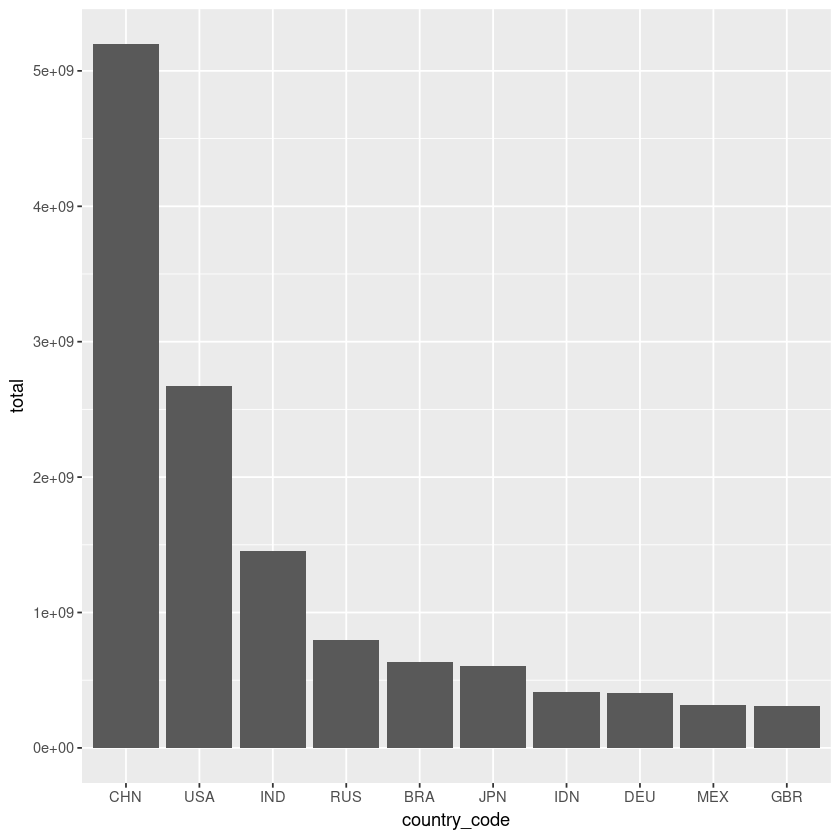

In [6]:
data_top$country_code <- factor(data_top$country_code, levels=data_top$country_code[order(data_top$total, decreasing=TRUE)])
ggplot(data=data_top, aes(country_code, total)) +
    geom_col()

In [7]:
data_percap <- data %>%
    filter(year == 2010, record == 'EFConsPerCap', Percapita.GDP..2010.USD.!='NA', ISO.alpha.3.code != '') %>%
    select(country, UN_region, total, gdp=Percapita.GDP..2010.USD.)

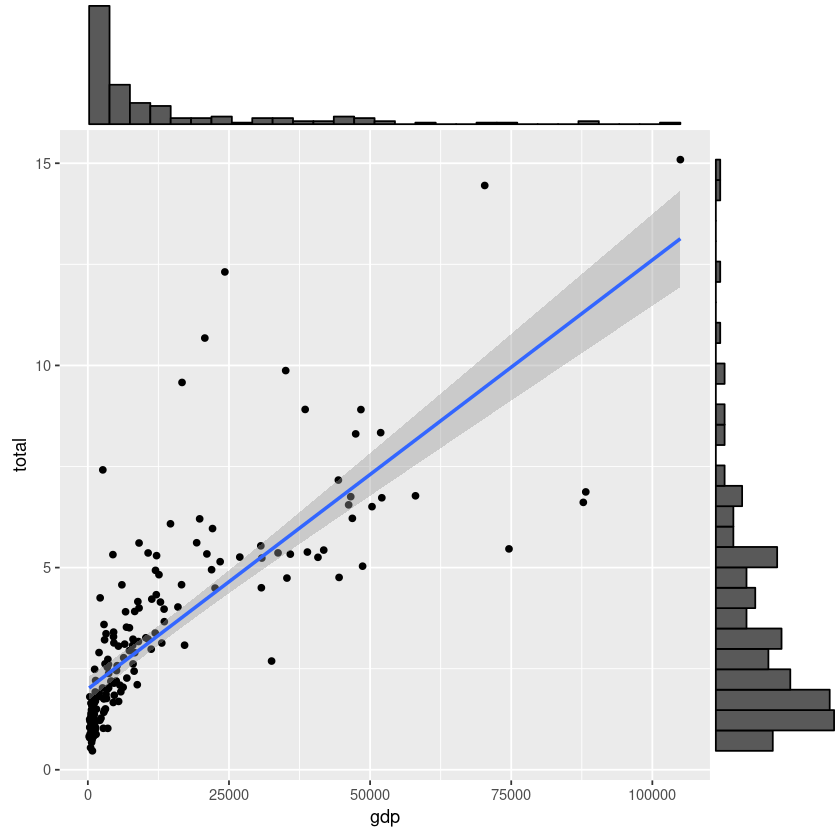

In [8]:
plot_center = ggplot(data_percap, aes(x=gdp, y=total)) + 
    geom_point() +
    geom_smooth(method='lm')
ggMarginal(plot_center, type='histogram')

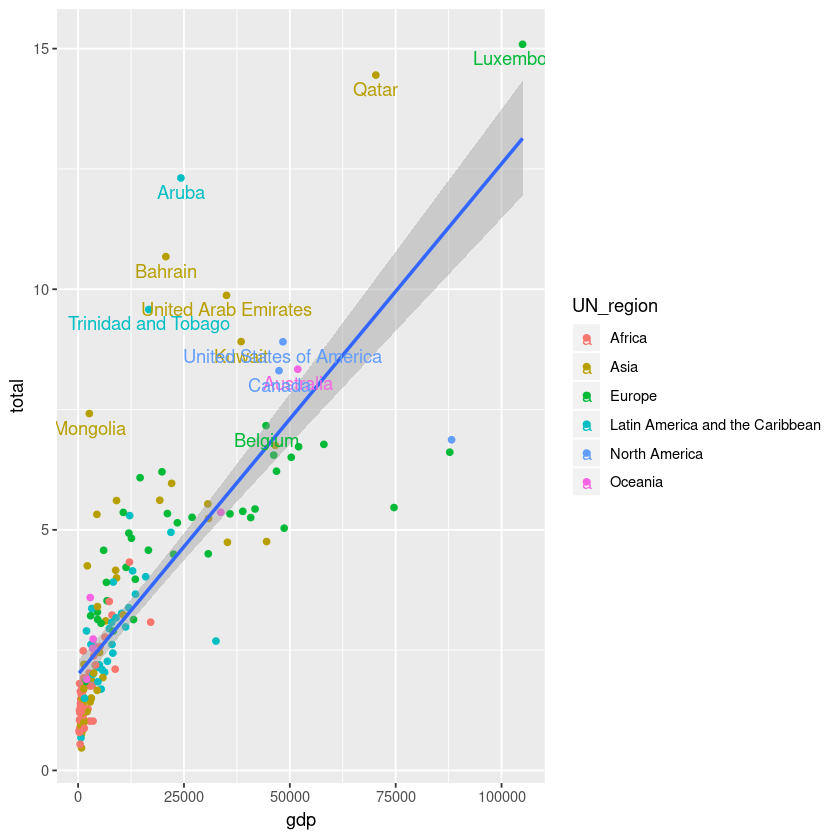

In [9]:
ggplot(data_percap, aes(x=gdp, y=total)) + 
    geom_point(aes(color=UN_region)) +
    geom_smooth(method='lm') +
    geom_text(aes(label=ifelse(total>7, as.character(country), ''), color=UN_region), vjust=1.5)

In [10]:
(eu <- scan('eu_iso3_2019.txt', what='', sep='\n'))

[1] "AUT" "BEL" "BGR" "HRV" "CYP" "CZE" "DNK" "EST" "FIN" "FRA" "DEU" "GRC"
[13] "HUN" "IRL" "ITA" "LVA" "LTU" "LUX" "MLT" "NLD" "POL" "PRT" "ROU" "SVK"
[25] "SVN" "ESP" "SWE" "GBR"

In [11]:
data_eu_percap <- data %>%
    filter(year == 2010, record == 'EFConsPerCap', ISO.alpha.3.code %in% eu, Percapita.GDP..2010.USD.!='NA', ISO.alpha.3.code != '') %>%
    select(country, UN_region, total, gdp=Percapita.GDP..2010.USD.)

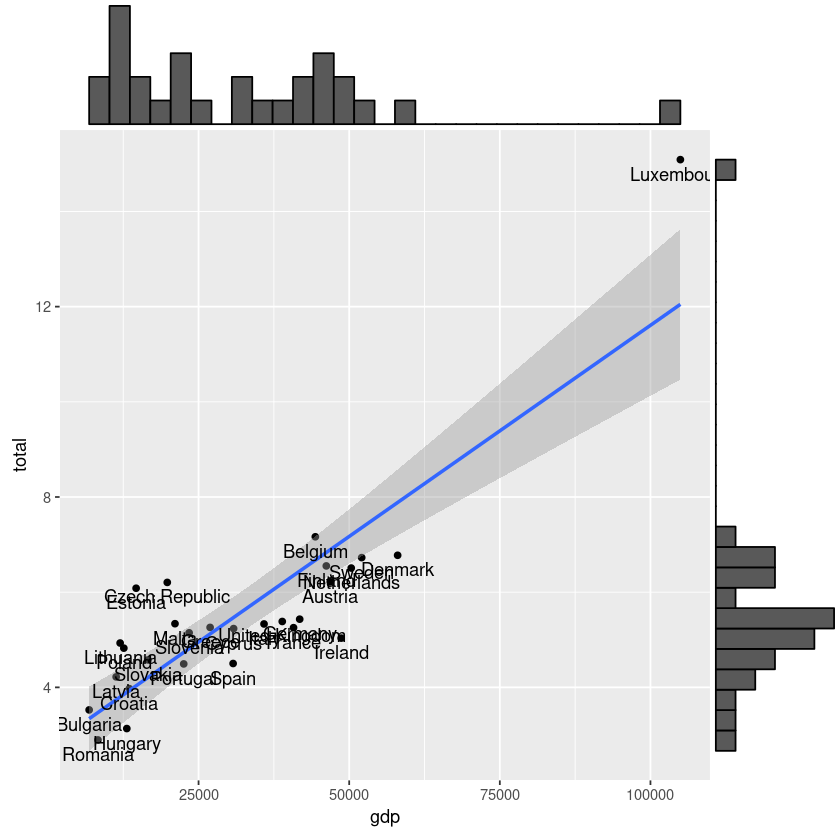

In [12]:
plot_center = ggplot(data_eu_percap, aes(x=gdp, y=total)) + 
    geom_point() +
    geom_smooth(method='lm') +
    geom_text(aes(label=country), vjust=1.5)
ggMarginal(plot_center, type='histogram')

In [13]:
data_hun <- data %>%
    filter(record == 'EFConsPerCap' | record == 'BiocapPerCap', country == 'Hungary') %>%
    select(year, record, total)

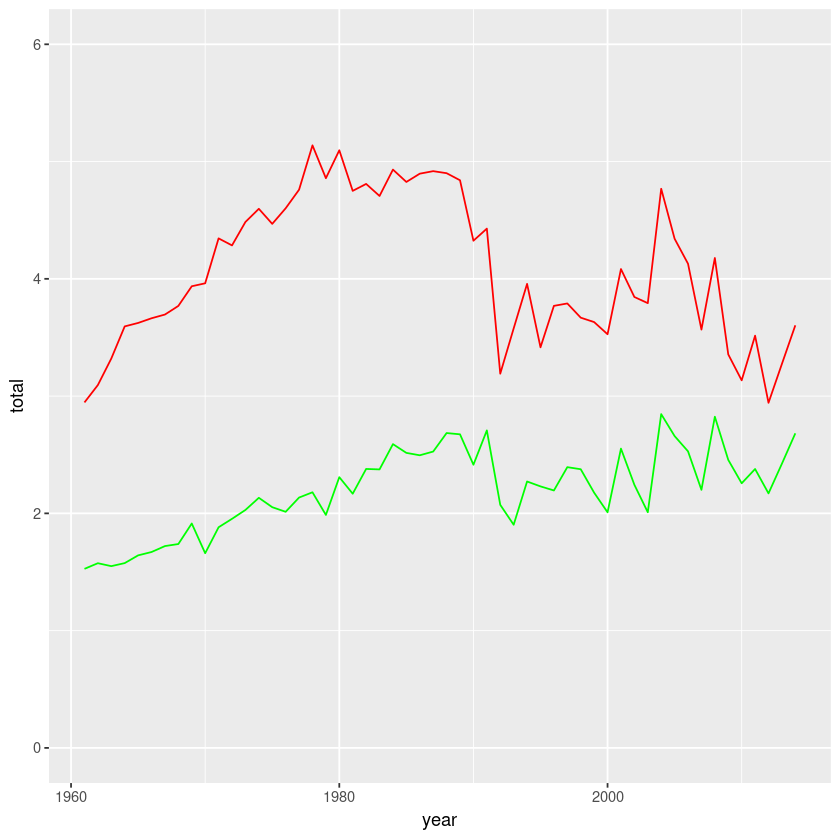

In [14]:
ggplot(data_hun, aes(year)) +
    geom_line(aes(y=total), data=.%>%filter(record == 'EFConsPerCap'), color='red') +
    geom_line(aes(y=total), data=.%>%filter(record == 'BiocapPerCap'), color='green') +
    scale_y_continuous(limits = c(0, 6))

In [15]:
(record_world <- data %>%
    filter(record == 'EFConsTotGHA', country == 'World', year == max_year) %>%
    select(crop_land, grazing_land, forest_land, fishing_ground, built_up_land, carbon))

crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3996304154,1049452892,2016300467,674260917,464997947,12400597298


In [20]:
(data_world <- melt(record_world, id.vars=NULL))

variable,value
<fct>,<dbl>
crop_land,3996304154
grazing_land,1049452892
forest_land,2016300467
fishing_ground,674260917
built_up_land,464997947
carbon,12400597298


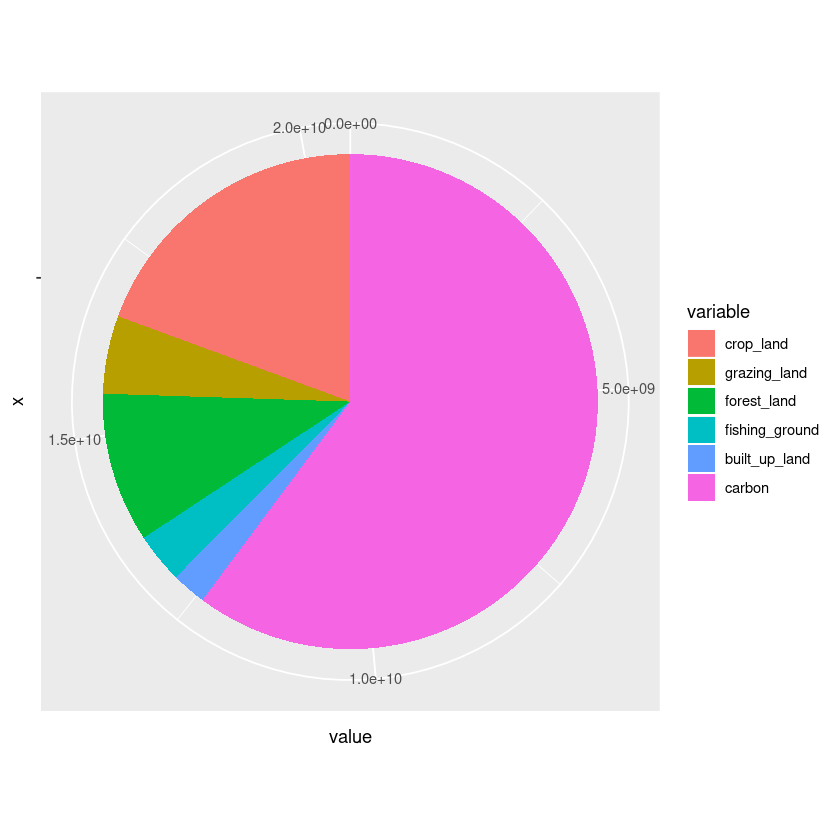

In [21]:
ggplot(data_world, aes(x='', y=value, fill=variable)) +
    geom_bar(stat='identity') +
    coord_polar('y', start=0)

In [22]:
data_world_dia <- data %>%
    filter(record == 'EFConsTotGHA', country == 'World') %>%
    select(year, crop_land, grazing_land, forest_land, fishing_ground, built_up_land, carbon)

In [23]:
data_world <- melt(data_world_dia, id=c('year'))

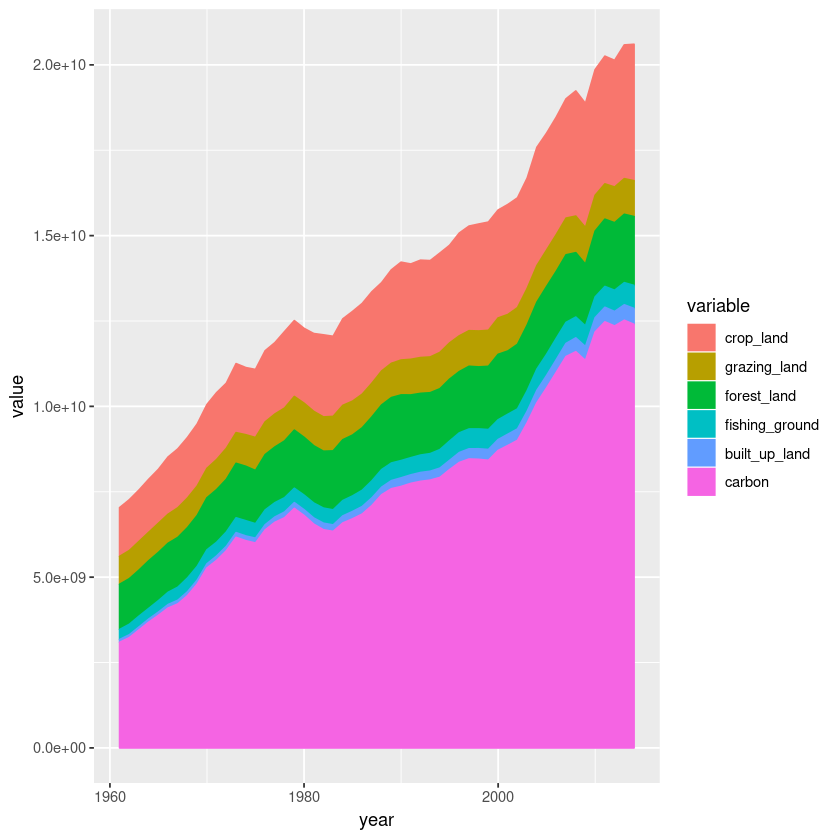

In [24]:
ggplot(data_world, aes(year, value)) +
    geom_area(aes(color=variable, fill=variable))